# ¿Cuál es la mejor tarifa?

Trabajas como analista para el operador de telecomunicaciones Megaline. La empresa ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de las tarifas genera más ingresos para poder ajustar el presupuesto de publicidad.

Vas a realizar un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Tendrás los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan, así como la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. Tu trabajo es analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos.

### Objetivo del proyecto:

A lo largo de este proyecto, se buscará tener un conocimiento más profundo acerca de los clientes de la empresa de telecomunicaciones **Megaline** y sus patrones de consumo respecto a llamadas y mensajes de texto en 2018 a fin de poder determinar cuál de las tarifas de prepago que actualmente cobra Megaliner resulta ser la que más ingresos genera.

### Acciones planeadas:

Para poder cumplir de forma adecuada con el objetivo previamente establecido, de forma general, los pasos a seguir serán estos:
1) Inicializar el cuaderno importando las librerías a utilizar y cargando los datos en dataframes de Pandas.
2) Analizar el estado "inicial" de los datos para conocer el tipo de dato que hay por variable (columna), el número de registros faltantes y número de registros duplicados.
3) Realizar las correcciones de tipo de datos (donde correspondan) y homogeneizar la presentación de los datos en forma de texto convirtíendolos todos en minúsculas, quitando espacios iniciales y finales y cualquier otro detalle que nos dificulte la comparación de cadenas de texto.
4) Eliminar registros duplicados (si aplica) y rellenar o eliminar los registros ausentes.
5) Reordenar la información de modo que podamos ligar a los usuarios con su tarifa y sus consumos de llamadas y mensajes de texto.
6) Obtener las medidas de tendencia central y disperción.
7) Comparar la información y obtener los resultados.

## Inicialización

In [1]:
# Cargar todas las librerías
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats as st

## Cargar datos

In [2]:
# Carga los archivos de datos en diferentes DataFrames/datasets/megaline_calls.csv Descargar conjunto de datos
df_calls = pd.read_csv("/datasets/megaline_calls.csv")
df_internet = pd.read_csv("/datasets/megaline_internet.csv")
df_messages = pd.read_csv("/datasets/megaline_messages.csv")
df_plans = pd.read_csv("/datasets/megaline_plans.csv")
df_users = pd.read_csv("/datasets/megaline_users.csv")

## Preparar los datos

Iniciamos explorando cada dataframe para conocer el tipo de datos por columna, la cantidad de duplicados y valores ausentes.

In [3]:
# Hacemos una lista con los dataframes y un for-loop para visualizar la información en cada uno de ellos.
lista_df = [df_calls, df_internet, df_messages, df_plans, df_users]

# Declaramos una función que nos permita ver el nombre del df (ya que al intentar llamar al atributo ".name" dentro del
# for-loop enviaba error).
def get_df_name(df):
    name =[x for x in globals() if globals()[x] is df][0]
    return name

# Aplicamos el for-loop
for df in lista_df:
    print(get_df_name(df))
    if df.shape[0] > 5:
        print("\n Una muestra aleatoria del df para darnos una idea de su contenido: \n",df.sample(5))
    else:
        print("\n Una muestra aleatoria del df para darnos una idea de su contenido: \n",df.sample(df.shape[0]))
    print("\nLos tipos da dato por columna son: \n",df.dtypes)
    print("\nEn cada columna hay estos valores ausentes: \n",df.isna().sum())
    print("\nEl df tiene esta cantidad de registros duplicados: \n",df.duplicated().sum())
    print("\n")

df_calls

 Una muestra aleatoria del df para darnos una idea de su contenido: 
                id  user_id   call_date  duration
35807    1134_129     1134  2018-12-20      2.27
126445    1449_67     1449  2018-10-08      7.40
73655    1261_426     1261  2018-10-06      8.68
102372  1362_1149     1362  2018-06-10     12.04
63428    1231_142     1231  2018-10-28     12.75

Los tipos da dato por columna son: 
 id            object
user_id        int64
call_date     object
duration     float64
dtype: object

En cada columna hay estos valores ausentes: 
 id           0
user_id      0
call_date    0
duration     0
dtype: int64

El df tiene esta cantidad de registros duplicados: 
 0


df_internet

 Una muestra aleatoria del df para darnos una idea de su contenido: 
               id  user_id session_date  mb_used
22322   1101_214     1101   2018-07-14   276.41
102807   1492_40     1492   2018-10-27   211.57
96105    1449_18     1449   2018-11-03   543.62
42669   1189_184     1189   2018-12-1

## Tarifas

In [4]:
# Imprime la información general/resumida sobre el DataFrame de las tarifas
print(df_plans.describe().T)

                       count      mean           std       min        25%  \
messages_included        2.0    525.00    671.751442     50.00    287.500   
mb_per_month_included    2.0  23040.00  10861.160159  15360.00  19200.000   
minutes_included         2.0   1750.00   1767.766953    500.00   1125.000   
usd_monthly_pay          2.0     45.00     35.355339     20.00     32.500   
usd_per_gb               2.0      8.50      2.121320      7.00      7.750   
usd_per_message          2.0      0.02      0.014142      0.01      0.015   
usd_per_minute           2.0      0.02      0.014142      0.01      0.015   

                            50%        75%       max  
messages_included        525.00    762.500   1000.00  
mb_per_month_included  23040.00  26880.000  30720.00  
minutes_included        1750.00   2375.000   3000.00  
usd_monthly_pay           45.00     57.500     70.00  
usd_per_gb                 8.50      9.250     10.00  
usd_per_message            0.02      0.025      0.03 

In [5]:
# Imprime una muestra de los datos para las tarifas
print(df_plans.sample(df_plans.shape[0]))


   messages_included  mb_per_month_included  minutes_included  \
1               1000                  30720              3000   
0                 50                  15360               500   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  
1               70           7             0.01            0.01  ultimate  
0               20          10             0.03            0.03      surf  


#### Observaciones:
Para este dataframe de Tarifas (*plans*), se pueden apreciar 3 detalles que hay que cuidar:
1) Los planes incluyen "mb", sin embargo, el cobro es por "gb". 1 Gb = 1024 Mb; esta conversión será importante.
2) Todas las variables de costo (empiezan con "usd") deberán pasarse a tipo float para garantizar la integridad en las operaciones matemáticas.
3) Es importante considerar que la variable "usd_monthly_pay" siempre se sumará, incluso cuando se excedan los minutos, mensajes o internet del plan.

## Corregir datos

Se cambiará el tipo de dato de todas las columnas que inician con "usd" a float como se estableció antes:

In [6]:
# Seleccionamos las columnas a trabajar:
columnas_usd = ['usd_monthly_pay', 'usd_per_gb', 'usd_per_message', 'usd_per_minute']

# Creamos un for-loop para hacer el cambio:
for column in df_plans.columns:
    if column in columnas_usd:
        df_plans[column] = df_plans[column].astype(float)

# Imprimimos confirmación de los resultados:
print(df_plans.dtypes)

messages_included          int64
mb_per_month_included      int64
minutes_included           int64
usd_monthly_pay          float64
usd_per_gb               float64
usd_per_message          float64
usd_per_minute           float64
plan_name                 object
dtype: object


## Enriquecer los datos

Por posterior comodidad, agregaremos una columna con los Gb incluidos en el plan:

In [7]:
df_plans['gb_per_month_included'] = df_plans['mb_per_month_included'] / 1024

# Imprimimos para validar:
print(df_plans.head(3))

   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  \
0             20.0        10.0             0.03            0.03      surf   
1             70.0         7.0             0.01            0.01  ultimate   

   gb_per_month_included  
0                   15.0  
1                   30.0  


## Usuarios/as

In [8]:
# Imprime la información general/resumida sobre el DataFrame de usuarios
print(df_users.describe().T)

         count      mean         std     min      25%     50%      75%     max
user_id  500.0  1249.500  144.481833  1000.0  1124.75  1249.5  1374.25  1499.0
age      500.0    45.486   16.972269    18.0    30.00    46.0    61.00    75.0


In [9]:
# Imprime una muestra de datos para usuarios
print(df_users.sample(5))

     user_id first_name  last_name  age  \
444     1444     Glinda  Dickerson   70   
40      1040      Paris     Santos   72   
456     1456    Seymour      Olsen   66   
270     1270   Anjelica       Chan   70   
372     1372     Patria        Kim   26   

                                                city    reg_date      plan  \
444                        New Haven-Milford, CT MSA  2018-06-20      surf   
40   Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA  2018-12-23      surf   
456      Minneapolis-St. Paul-Bloomington, MN-WI MSA  2018-06-02  ultimate   
270  Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA  2018-09-18  ultimate   
372        New York-Newark-Jersey City, NY-NJ-PA MSA  2018-10-08      surf   

     churn_date  
444         NaN  
40   2018-12-30  
456         NaN  
270         NaN  
372         NaN  


#### Observaciones:
Al explorar el df de usuarios, se tienen las siguientes observaciones:
1) Cambiar el tipo de datos para las fechas (reg y churn) a uno adecuado para realizar operaciones de fechas (datetime).
2) Para el manejo de los valores faltantes en la columna churn, podemos aplicar una de dos alternativas:
    
    a) Reemplazar por la fecha de hoy y, cuando se requiera, validar que si la fecha de churn es igual a la de hoy...
    
    b) Dejarlos como NaN y, cuando se requiera, validar que si el valor es NaN, entonces...
3) Separar la columna de ciudad mediante la coma que separa la ciudad de la abreviatura del estado.
    
    a) Aquí se detecta que hay registros con más de una ciudad y más de un estado, a priori se propone utilizar solo el último registrado.

### Corregir los datos

Realizamos las modificaciones propuestas en el punto anterior.

In [10]:
df_users['reg_date'] = pd.to_datetime(df_users['reg_date'])
df_users['churn_date'] = pd.to_datetime(df_users['churn_date'])

# Imprimimos para comprobar:
print(df_users.dtypes)

user_id                int64
first_name            object
last_name             object
age                    int64
city                  object
reg_date      datetime64[ns]
plan                  object
churn_date    datetime64[ns]
dtype: object


### Enriquecer los datos

Consideramos que la forma de enriquecer los datos es dividiendo la columna de city como se ha mencionado antes:

In [50]:
# Ciclamos a lo largo de la columna de ciudad para obtener los valores de la ciudad y del código del estado:
for i,row in df_users.iterrows():
    split_list = row["city"].split(", ")
    city = split_list[0].split("-")
    df_users.loc[i,"city_corr"] = city[len(city)-1]
    state_code = split_list[1].split(" ")
    df_users.loc[i,"state_code"] = state_code[0]
    
# Imprimimos para verificar todo saliera como se esperaba:
print(df_users.sample(5))

     user_id first_name last_name  age  \
64      1064    Gerardo    Ashley   46   
488     1488    Shirley     Jones   29   
109     1109    Dominic   Salinas   41   
94      1094     Walter  Petersen   54   
356     1356        Hae      Ryan   46   

                                          city   reg_date  plan churn_date  \
64   New York-Newark-Jersey City, NY-NJ-PA MSA 2018-06-03  surf        NaT   
488                        Baton Rouge, LA MSA 2018-05-15  surf        NaT   
109  New York-Newark-Jersey City, NY-NJ-PA MSA 2018-02-16  surf        NaT   
94      Los Angeles-Long Beach-Anaheim, CA MSA 2018-10-30  surf 2018-12-12   
356                 Milwaukee-Waukesha, WI MSA 2018-05-16  surf        NaT   

       city_corr state_code  
64   Jersey City   NY-NJ-PA  
488  Baton Rouge         LA  
109  Jersey City   NY-NJ-PA  
94       Anaheim         CA  
356     Waukesha         WI  


## Llamadas

In [12]:
# Imprime la información general/resumida sobre el DataFrame de las llamadas
print(df_calls.describe().T)

             count         mean         std     min      25%      50%  \
user_id   137735.0  1247.658046  139.416268  1000.0  1128.00  1247.00   
duration  137735.0     6.745927    5.839241     0.0     1.29     5.98   

              75%     max  
user_id   1365.00  1499.0  
duration    10.69    37.6  


In [13]:
# Imprime una muestra de datos para las llamadas
print(df_calls.sample(5))

              id  user_id   call_date  duration
8371    1039_311     1039  2018-09-30     12.46
112726  1397_356     1397  2018-08-06      2.53
83955   1305_438     1305  2018-06-27      3.61
23545     1087_1     1087  2018-12-06      5.40
135075  1490_175     1490  2018-11-30      0.00


#### Observaciones:
Para este df de llamadas, el único cambio a realizar será cambiar el tipo de dato de "call_date" a una fecha. Sin embargo, al observar la estructura del id de la tabla, se aprecia que consta de dos partes, siendo la primera el id del usuario, por lo que se supone que la segunda parte es el número de llamada realizada, así que crearemos una columna que almacene este dato.

Por último, dividiremos la fecha en año y mes.

### Corregir los datos

Cambiaremos el tipo de dato de la fecha de llamada.

In [14]:
df_calls["call_date"] = pd.to_datetime(df_calls["call_date"])

# Imprimimos comprobación:
print(df_calls["call_date"].dtype)

datetime64[ns]


### Enriquecer los datos

Crearemos una columna que almacene el número de la llamada.

In [15]:
call_no = []

for i,row in df_calls.iterrows():
    id_list = row["id"].split("_")
    call_no.append(id_list[1])

df_calls["call_no"] = call_no

df_calls["call_month"] = df_calls["call_date"].dt.month
df_calls["call_year"] = df_calls["call_date"].dt.year

# Imprimimos para validar:
print(df_calls.head(3))

         id  user_id  call_date  duration call_no  call_month  call_year
0   1000_93     1000 2018-12-27      8.52      93          12       2018
1  1000_145     1000 2018-12-27     13.66     145          12       2018
2  1000_247     1000 2018-12-27     14.48     247          12       2018


## Mensajes

In [16]:
# Imprime la información general/resumida sobre el DataFrame de los mensajes
print(df_messages.describe().T)

           count         mean         std     min     25%     50%     75%  \
user_id  76051.0  1245.972768  139.843635  1000.0  1123.0  1251.0  1362.0   

            max  
user_id  1497.0  


In [17]:
# Imprime una muestra de datos para los mensajes
print(df_messages.sample(5))

             id  user_id message_date
68624  1444_107     1444   2018-08-16
48222  1324_954     1324   2018-06-21
57732  1363_124     1363   2018-12-21
75854   1494_92     1494   2018-08-28
1204   1011_167     1011   2018-09-26


#### Observaciones:
Puesto que, igual que en las demás tablas no hay registros duplicados ni ausentes (salvo por df_users), solo quedará cambiar el tipo de dato de la fecha del mensaje a un tipo datetime; así mismo, se realizará un procedimiento similar al aplicado para las llamadas almacenando el número de mensaje obtenido a partir del id.

Por último, dividiremos la fecha en año y mes.

### Corregir los datos

Cambiaremos el tipo de dato de la fecha del mensaje.

In [18]:
df_messages["message_date"] = pd.to_datetime(df_messages["message_date"])

# Imprimimos para validar:
print(df_messages["message_date"].dtype)

datetime64[ns]


### Enriquecer los datos

Se dividirá el id del mensaje de forma semejante a como se hizo con las llamadas.

Nota: Debido al largo tiempo que estaba llevando realizar la operación dentro de un for-loop (similar a lo que se hizo con el cambio de city a dos nuevas columnas en users), se decidió crear una lista con los números de llamadas. Se estima esto se debe al volumen de información de dicho df, por lo mismo, se aplicará ese mismo procedimiento con los mensajes.

In [19]:
mss_no = []

for i,row in df_messages.iterrows():
    id_list = row["id"].split("_")
    mss_no.append(id_list[1])

df_messages["mss_no"] = mss_no

df_messages["mss_month"] = df_messages["message_date"].dt.month
df_messages["mss_year"] = df_messages["message_date"].dt.year

# Imprimimos para validar:
print(df_messages.head(3))

         id  user_id message_date mss_no  mss_month  mss_year
0  1000_125     1000   2018-12-27    125         12      2018
1  1000_160     1000   2018-12-31    160         12      2018
2  1000_223     1000   2018-12-31    223         12      2018


## Internet

In [20]:
# Imprime la información general/resumida sobre el DataFrame de internet
print(df_internet.describe().T)

            count         mean         std     min      25%      50%      75%  \
user_id  104825.0  1242.496361  142.053913  1000.0  1122.00  1236.00  1367.00   
mb_used  104825.0   366.713701  277.170542     0.0   136.08   343.98   554.61   

             max  
user_id  1499.00  
mb_used  1693.47  


In [21]:
# Imprime una muestra de datos para el tráfico de internet
print(df_internet.sample(5))

             id  user_id session_date  mb_used
11823  1057_163     1057   2018-12-05   473.12
45321  1201_183     1201   2018-07-07   420.88
36818  1165_333     1165   2018-10-30   302.58
92893  1434_122     1434   2018-04-22   578.25
26801  1123_296     1123   2018-12-07   485.40


#### Observaciones:
Siguiendo la línea que hemos marcado antes, cambiaremos la fecha de sesión (conexión) a un tipo de dato de fecha, obtendremos el número de sesión y convertiremos los Mb en Gb.

Por último, dividiremos la fecha en año y mes.

### Corregir los datos

Se cambiará el tipo de dato para la fecha de la sesión.

In [22]:
df_internet["session_date"] =pd.to_datetime(df_internet["session_date"])

# Imprimimos validación:
print(df_internet["session_date"].dtype)

datetime64[ns]


### Enriquecer los datos

Primero aplicamos el mismo método que con llamadas y mensajes para extraer el número de sesión, luego convertimos Mb a Gb.

In [23]:
ses_no = []

for i,row in df_internet.iterrows():
    id_list = row["id"].split("_")
    ses_no.append(id_list[1])

df_internet["ses_no"] = ses_no
df_internet["gb_used"] = df_internet["mb_used"] / 1024

df_internet["ses_month"] = df_internet["session_date"].dt.month
df_internet["ses_year"] = df_internet["session_date"].dt.year

# Imprimimos para validar:
print(df_internet.head(3))

         id  user_id session_date  mb_used ses_no   gb_used  ses_month  \
0   1000_13     1000   2018-12-29    89.86     13  0.087754         12   
1  1000_204     1000   2018-12-31     0.00    204  0.000000         12   
2  1000_379     1000   2018-12-28   660.40    379  0.644922         12   

   ses_year  
0      2018  
1      2018  
2      2018  


## Estudiar las condiciones de las tarifas

Para visualizar las condiciones de los distintos planes/tarifas simplemente visualizamos el df de planes.

In [24]:
# Imprime las condiciones de la tarifa y asegúrate de que te quedan claras
df_plans

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,gb_per_month_included
0,50,15360,500,20.0,10.0,0.03,0.03,surf,15.0
1,1000,30720,3000,70.0,7.0,0.01,0.01,ultimate,30.0


## Agregar datos por usuario

[Ahora que los datos están limpios, agrega los datos por usuario y por periodo para que solo haya un registro por usuario y por periodo. Esto facilitará mucho el análisis posterior.]

In [25]:
# Calcula el número de llamadas hechas por cada usuario al mes. Guarda el resultado.
df_calls_user = df_calls.groupby(['user_id','call_month'])['call_no'].count()
print(df_calls_user)

user_id  call_month
1000     12            16
1001     8             27
         9             49
         10            65
         11            64
                       ..
1498     12            39
1499     9             41
         10            53
         11            45
         12            65
Name: call_no, Length: 2258, dtype: int64


In [26]:
# Calcula la cantidad de minutos usados por cada usuario al mes. Guarda el resultado.
df_mins_user = df_calls.groupby(['user_id','call_month'])['duration'].sum()
print(df_mins_user)

user_id  call_month
1000     12            116.83
1001     8             171.14
         9             297.69
         10            374.11
         11            404.59
                        ...  
1498     12            324.77
1499     9             330.37
         10            363.28
         11            288.56
         12            468.10
Name: duration, Length: 2258, dtype: float64


In [27]:
# Calcula el número de mensajes enviados por cada usuario al mes. Guarda el resultado.
df_mss_user = df_messages.groupby(['user_id','mss_month'])['mss_no'].count()
print(df_mss_user)

user_id  mss_month
1000     12           11
1001     8            30
         9            44
         10           53
         11           36
                      ..
1496     9            21
         10           18
         11           13
         12           11
1497     12           50
Name: mss_no, Length: 1806, dtype: int64


In [28]:
# Calcula el volumen del tráfico de Internet usado por cada usuario al mes. Guarda el resultado.
df_internet_user = df_internet.groupby(['user_id','ses_month'])['gb_used'].sum()
print(df_internet_user)

user_id  ses_month
1000     12            1.856904
1001     8             6.756982
         9            13.002754
         10           21.807119
         11           18.070605
                        ...    
1498     12           22.595400
1499     9            12.680430
         10           19.035576
         11           16.419756
         12           21.542197
Name: gb_used, Length: 2277, dtype: float64


Fusionaremos los resultados obtenidos en un dataframe único:

In [29]:
# Fusiona los datos de llamadas, minutos, mensajes e Internet con base en user_id y month
df_user_sum = pd.concat([df_calls_user,df_mins_user,df_mss_user,df_internet_user],axis='columns')

# Puesto que algunos usuarios no han utilizado algunas de las prestaciones de sus planes, indicamos como 0 su consumo.
df_user_sum.fillna(0,inplace=True)

df_user_sum

call_no  duration  mss_no    gb_used
user_id                                         
1000    12     16.0    116.83    11.0   1.856904
1001    8      27.0    171.14    30.0   6.756982
        9      49.0    297.69    44.0  13.002754
        10     65.0    374.11    53.0  21.807119
        11     64.0    404.59    36.0  18.070605
...             ...       ...     ...        ...
1498    12     39.0    324.77     0.0  22.595400
1499    9      41.0    330.37     0.0  12.680430
        10     53.0    363.28     0.0  19.035576
        11     45.0    288.56     0.0  16.419756
        12     65.0    468.10     0.0  21.542197

[2293 rows x 4 columns]

In [30]:
# Añade la información de la tarifa
df_user_sum_2 = df_user_sum.reset_index()
new_columns = {'user_id':'user_id','level_1':'month_no','call_no':'no_calls','duration':'total_dur',
               'mss_no':'total_mss','gb_used':'gb_used'}
df_user_sum_2.rename(new_columns,inplace=True,axis=1)

df_user_sum_2 = df_user_sum_2.merge(df_users[['user_id','plan']])

df_user_sum_2

,user_id,month_no,no_calls,total_dur,total_mss,gb_used,plan
0,1000,12,16.0,116.83,11.0,1.856904,ultimate
1,1001,8,27.0,171.14,30.0,6.756982,surf
2,1001,9,49.0,297.69,44.0,13.002754,surf
3,1001,10,65.0,374.11,53.0,21.807119,surf
4,1001,11,64.0,404.59,36.0,18.070605,surf
...,...,...,...,...,...,...,...
2288,1498,12,39.0,324.77,0.0,22.595400,surf
2289,1499,9,41.0,330.37,0.0,12.680430,surf
2290,1499,10,53.0,363.28,0.0,19.035576,surf
2291,1499,11,45.0,288.56,0.0,16.419756,surf


[Calcula los ingresos mensuales por usuario (resta el límite del paquete gratuito del número total de llamadas, mensajes de texto y datos; multiplica el resultado por el valor del plan de llamadas; añade la tarifa mensual en función del plan de llamadas). Nota: Dadas las condiciones del plan, ¡esto podría no ser tan trivial como un par de líneas! Así que no pasa nada si dedicas algo de tiempo a ello.]

In [31]:
# Ciclamos para calcular:
for i,row in df_user_sum_2.iterrows():
    plan = row['plan']
    # Costo base del plan:
    costo_base = df_plans['usd_monthly_pay'][df_plans['plan_name']==plan].sum()
    # Minutos extra:
    mins_inc = df_plans['minutes_included'][df_plans['plan_name']==plan].sum()
    min_ad = df_plans['usd_per_minute'][df_plans['plan_name']==plan].sum()
    if row['total_dur'] > mins_inc:
        extra_mins = (row['total_dur'] - mins_inc) * min_ad
    else:
        extra_mins = 0
    # Mensajes extra:
    mss_inc = df_plans['messages_included'][df_plans['plan_name']==plan].sum()
    mss_ad = df_plans['usd_per_message'][df_plans['plan_name']==plan].sum()
    if row['total_mss'] > mss_inc:
        extra_mins = (row['total_mss'] - mss_inc) * mss_ad
    else:
        extra_mss = 0
    # Gb extra:
    gb_inc = df_plans['gb_per_month_included'][df_plans['plan_name']==plan].sum()
    gb_ad = df_plans['usd_per_gb'][df_plans['plan_name']==plan].sum()
    if row['gb_used'] >gb_inc:
        extra_mins = (row['gb_used'] - gb_inc) * gb_ad
    else:
        extra_gb = 0
    # Cargo total:
    cargo_tot = costo_base + extra_mins + extra_mss + extra_gb
    df_user_sum_2.loc[i,'Importe_Mes'] = cargo_tot

# Imprimimos para validar:
df_user_sum_2.sample(5)

,user_id,month_no,no_calls,total_dur,total_mss,gb_used,plan,Importe_Mes
1030,1214,12,59.0,359.76,22.0,15.859297,ultimate,70.000000
1177,1251,4,63.0,463.85,33.0,22.072227,surf,90.722266
1971,1420,11,37.0,277.62,2.0,16.985127,ultimate,70.000000
1384,1299,6,60.0,293.65,6.0,18.131338,surf,51.313379
218,1053,7,3.0,16.06,0.0,0.835518,surf,20.000000


In [32]:
# Agrupamos por usuario para obtener el total que se le ha cobrado a cada uno:
df_user_tot = df_user_sum_2.groupby('user_id')['Importe_Mes'].sum()

print(df_user_tot)

user_id
1000     70.000000
1001    237.929395
1002     98.916797
1003    134.102930
1004    580.937207
           ...    
1495    445.732031
1496    120.588477
1497     70.000000
1498    797.323730
1499    199.975293
Name: Importe_Mes, Length: 490, dtype: float64


## Estudia el comportamiento de usuario

[Calcula algunas estadísticas descriptivas para los datos agregados y fusionados que nos sean útiles y que muestren un panorama general captado por los datos. Dibuja gráficos útiles para facilitar la comprensión. Dado que la tarea principal es comparar las tarifas y decidir cuál es más rentable, las estadísticas y gráficas deben calcularse por tarifa.]

[En los comentarios hallarás pistas relevantes para las llamadas, pero no las hay para los mensajes e Internet. Sin embargo, el principio del estudio estadístico que se aplica para ellos es el mismo que para las llamadas.]

### Llamadas

plan            surf  ultimate
call_month                    
1           6.428000  6.541518
2           6.906175  6.517230
3           6.696919  6.210906
4           6.799918  6.659990
5           6.769200  6.662443
6           6.846812  6.705188
7           6.721710  6.879085
8           6.726164  6.613484
9           6.728684  6.770040
10          6.722302  6.665850
11          6.759115  6.742506
12          6.836607  6.671929


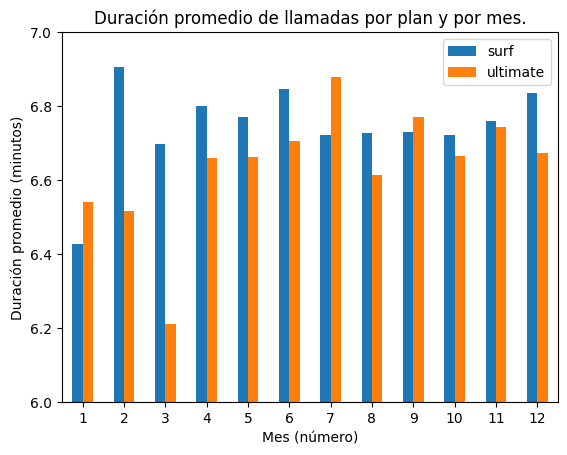

In [33]:
# Compara la duración promedio de llamadas por cada plan y por cada mes. Traza un gráfico de barras para visualizarla.
df_calls_plan = df_calls.merge(df_users[['user_id','plan']],left_on='user_id',right_on='user_id',how='left')
df_calls_gp = df_calls_plan.groupby(['plan','call_month'])['duration'].mean()
df_calls_piv = df_calls_plan.pivot_table(index='call_month',columns='plan',values='duration',aggfunc='mean')

# Imprimimos para validar:
print(df_calls_piv)

# Realizamos el gráfico:
df_calls_piv.plot(kind='bar',
                 title='Duración promedio de llamadas por plan y por mes.',
                 xlabel= 'Mes (número)',ylabel='Duración promedio (minutos)',
                 rot=0,
                 ylim=[6,7])
plt.legend(['surf','ultimate'])

plt.show()

plan              surf    ultimate
call_month                        
1           192.840000  183.162500
2           280.851111  443.171667
3           310.970000  285.701667
4           332.380000  316.508095
5           387.108000  383.664828
6           411.450625  365.358222
7           428.060917  403.767288
8           394.474717  397.274789
9           397.133298  413.287326
10          414.435733  429.217238
11          408.255415  423.814683
12          457.547074  438.824832


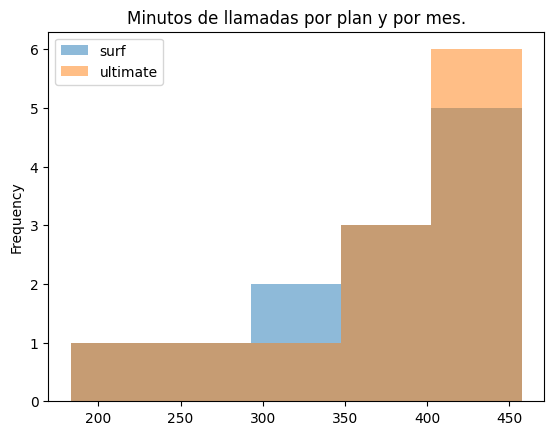

In [34]:
# Compara el número de minutos mensuales que necesitan los usuarios de cada plan. Traza un histograma.
df_calls_piv_2 = df_calls_plan.pivot_table(index='call_month',columns='plan',values='duration',aggfunc='sum')
df_calls_users = df_calls_plan.pivot_table(index='call_month',columns='plan',values='user_id',aggfunc=lambda x: len(x.unique()))
df_mins_per_user = df_calls_piv_2 / df_calls_users

# Imprimimos para validar:
print(df_mins_per_user)

# Construimos el histograma:
df_mins_per_user.plot(kind='hist',
                 title='Minutos de llamadas por plan y por mes.',
                 xlabel= 'Mes (número)',ylabel='Duración total (minutos)',
                 rot=0, bins=5, alpha = 0.5)
plt.legend(['surf','ultimate'])

plt.show()

A continuación, calcularemos la media de la duración promedio de llamadas por mes y plan, así como la varianza de estos valores por plan / tarifa.

In [35]:
# Calcula la media y la varianza de la duración mensual de llamadas.
print("Promedio del total de minutos de llamadas por usuario por mes y por tipo de plan: \n",df_mins_per_user.mean())
print("Varianza de la variable: \n",df_mins_per_user.var())

Promedio del total de minutos de llamadas por usuario por mes y por tipo de plan: 
 plan
surf        367.958908
ultimate    373.646094
dtype: float64
Varianza de la variable: 
 plan
surf        5636.603596
ultimate    5925.107084
dtype: float64


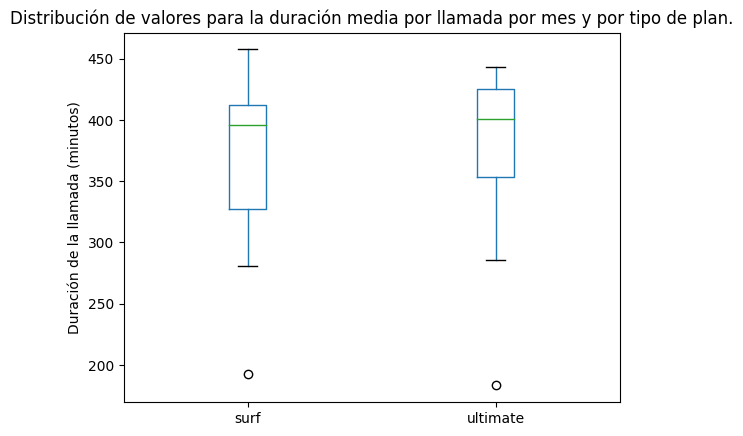

In [36]:
# Traza un diagrama de caja para visualizar la distribución de la duración mensual de llamadas
df_mins_per_user.plot(kind='box',
                 title = 'Distribución de valores para la duración media por llamada por mes y por tipo de plan.',
                 ylabel='Duración de la llamada (minutos)')

plt.show()

Realizando un análisis sobre el comportamiento de la duración promedio de las llamadas por mes por parte de los usuarios, se puede observar que los usuarios del plan "básico", **SURF**, tienden a mantener llamadas poco más cortas que aquellos con plan **ULTIMATE**, sin embargo, sus promedios de minutos mensuales por usuario y por mes para ambos planes es muy similar, así como su distribución medida a través de la varianza.

### Mensajes

plan            surf   ultimate
mss_month                      
1          21.000000  20.666667
2          21.600000  25.166667
3          21.937500  34.714286
4          24.166667  28.937500
5          33.017857  44.333333
6          33.616438  36.289474
7          35.945055  41.212766
8          37.596774  47.929825
9          39.523179  45.901408
10         42.433862  46.977528
11         40.553097  47.601942
12         48.326772  53.936508


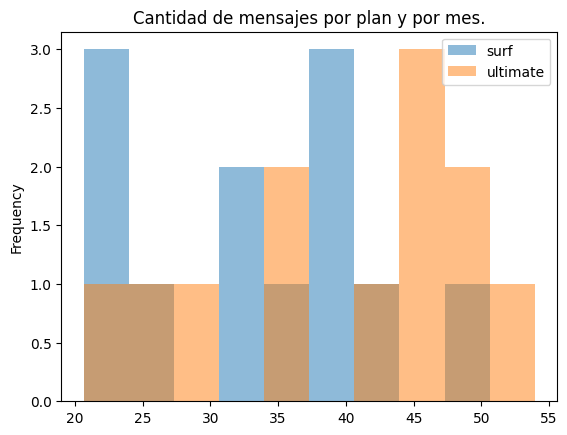

In [37]:
# Comprara el número de mensajes que tienden a enviar cada mes los usuarios de cada plan
df_mss_plan = df_messages.merge(df_users[['user_id','plan']],left_on='user_id',right_on='user_id',how='left')
df_mss_piv = df_mss_plan.pivot_table(index='mss_month',columns='plan',values='mss_no',aggfunc='count')

df_mss_users = df_mss_plan.pivot_table(index='mss_month',columns='plan',values='user_id',aggfunc=lambda x: len(x.unique()))
df_mss_per_user = df_mss_piv / df_mss_users

# Imprimimos para validar:
print(df_mss_per_user)

# Realizamos el gráfico:
df_mss_per_user.plot(kind='hist',
                 title='Cantidad de mensajes por plan y por mes.',
                 xlabel= 'Mes (número)',ylabel='Cantidad de mensajes',
                 rot=0, alpha = 0.5)
plt.legend(['surf','ultimate'])

plt.show()

In [38]:
# Calcula la media y la varianza de los mensajes totales enviados por usuario por mes y plan:
print("Promedio de total de mensajes por usuario por mes y por tipo de plan: \n",df_mss_per_user.mean())
print("Varianza de la variable: \n",df_mss_per_user.var())

Promedio de total de mensajes por usuario por mes y por tipo de plan: 
 plan
surf        33.309767
ultimate    39.472325
dtype: float64
Varianza de la variable: 
 plan
surf         84.264368
ultimate    106.655358
dtype: float64


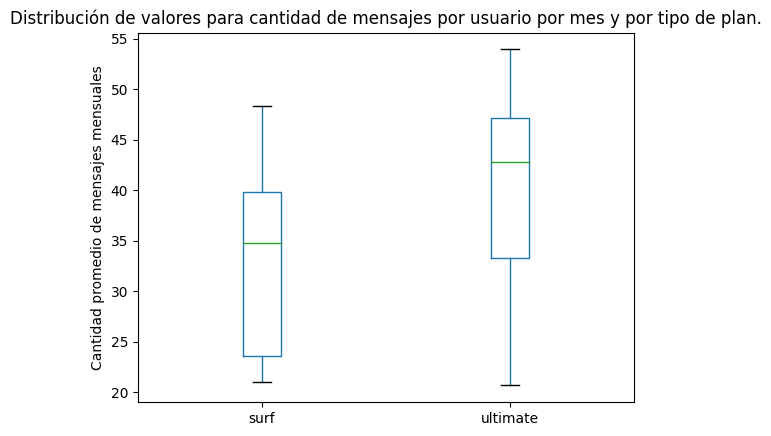

In [39]:
# Traza un diagrama de caja para visualizar la distribución de la cantidad de mensajes enviados
df_mss_per_user.plot(kind='box',
                 title = 'Distribución de valores para cantidad de mensajes por usuario por mes y por tipo de plan.',
                 ylabel='Cantidad promedio de mensajes mensuales')

plt.show()

Vemos que la mayoría de usuarios del plan **ULTIMATE** consumen significativamente más mensajes mensuales que aquellos con el dentro del plan **SURF**.

### Internet

plan            surf   ultimate
ses_month                      
1           4.760605   6.755950
2          11.893402  16.727352
3          13.032656  17.892108
4          11.942167  15.743803
5          13.788797  16.234846
6          15.257487  14.978439
7          16.526820  15.961664
8          16.711157  17.397188
9          16.286521  16.572138
10         17.122339  17.363566
11         16.069871  16.634458
12         17.763349  17.893742


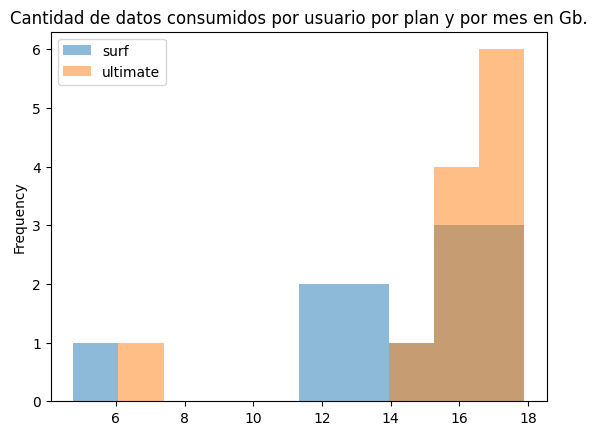

In [40]:
# Compara la cantidad de tráfico de Internet consumido por usuarios por plan
df_internet_plan = df_internet.merge(df_users[['user_id','plan']],left_on='user_id',right_on='user_id',how='left')
df_internet_piv = df_internet_plan.pivot_table(index='ses_month',columns='plan',values='gb_used',aggfunc='sum')

df_internet_users = df_internet_plan.pivot_table(index='ses_month',columns='plan',values='user_id',aggfunc=lambda x: len(x.unique()))
df_internet_per_user = df_internet_piv / df_internet_users

# Imprimimos para validar:
print(df_internet_per_user)

# Realizamos el gráfico:
df_internet_per_user.plot(kind='hist',
                 title='Cantidad de datos consumidos por usuario por plan y por mes en Gb.',
                 xlabel= 'Mes (número)',ylabel='Cantidad datos (Gb)',
                 rot=0, alpha = 0.5)
plt.legend(['surf','ultimate'])

plt.show()

In [41]:
# Calcula la media y la varianza de los gb totales usados por usuario por mes y plan:
print("Promedio de total de datos (en Gb) por usuario por mes y por tipo de plan: \n",df_internet_per_user.mean())
print("Varianza de la variable: \n",df_internet_per_user.var())

Promedio de total de datos (en Gb) por usuario por mes y por tipo de plan: 
 plan
surf        14.262931
ultimate    15.846271
dtype: float64
Varianza de la variable: 
 plan
surf        12.993675
ultimate     8.961038
dtype: float64


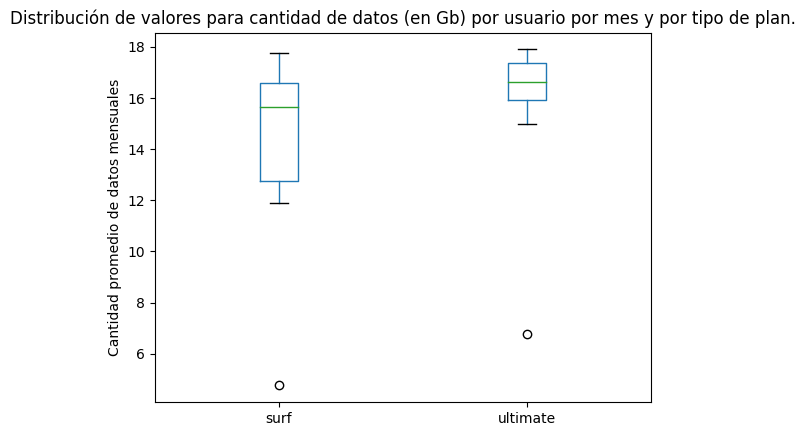

In [42]:
# Traza un diagrama de caja para visualizar la distribución de la cantidad de datos usados:
df_internet_per_user.plot(kind='box',
                 title = 'Distribución de valores para cantidad de datos (en Gb) por usuario por mes y por tipo de plan.',
                 ylabel='Cantidad promedio de datos mensuales')

plt.show()

En esta ocasión, el uso de datos promedio por usuario para ambos planes resulta estar distribuido de una forma más compacta que el caso de mensajes y llamadas, pero, al igual que con los mensajes, apreciamos un mayor consumo de datos en los usuarios con plan **ULTIMATE** frente a aquellos de **SURF**.

## Ingreso

[Del mismo modo que has estudiado el comportamiento de los usuarios, describe estadísticamente los ingresos de los planes.]

In [43]:
df_ing_prom_plans = df_user_sum_2.groupby('plan')['Importe_Mes'].mean()
print("Promedio de gasto mensual por plan:\n",df_ing_prom_plans)
df_ing_tot_plans = df_user_sum_2.groupby('plan')['Importe_Mes'].sum()
print("\nTotal de ingresos por plan:\n",df_ing_tot_plans)
df_ing_user_plans = df_user_sum_2.pivot_table(index='plan',columns='month_no',values='user_id',aggfunc=lambda x: len(x.unique()))
print("\nTotal de usuarios por plan:\n",df_ing_user_plans)

Promedio de gasto mensual por plan:
 plan
surf        55.922364
ultimate    72.116080
Name: Importe_Mes, dtype: float64

Total de ingresos por plan:
 plan
surf        87965.878738
ultimate    51923.577344
Name: Importe_Mes, dtype: float64

Total de usuarios por plan:
 month_no  1   2   3   4   5   6    7    8    9    10   11   12
plan                                                          
surf       2   9  23  50  77  97  121  162  194  237  283  318
ultimate   4   7  12  21  29  47   59   71   86  106  127  151


plan              surf      ultimate
month_no                            
1            40.000000    280.000000
2           288.965000    490.000000
3           989.136133    880.709375
4          1908.231658   1528.198916
5          3414.117487   2044.955869
6          4330.322370   3359.418057
7          6964.052845   4239.174434
8          9611.638725   5160.287275
9         10477.639325   6175.858623
10        14269.914148   7641.719053
11        15212.648533   9093.352871
12        20459.212515  11029.902871


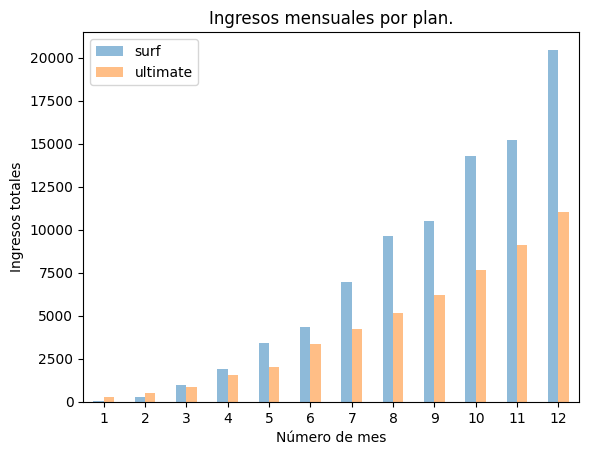

In [44]:
# Realizamos un gráfico:
df_planes_graf = df_user_sum_2.pivot_table(index='month_no',columns='plan',values='Importe_Mes',aggfunc='sum')

print(df_planes_graf)
df_planes_graf.plot(kind='bar',
                 title='Ingresos mensuales por plan.',
                 xlabel= 'Número de mes',ylabel='Ingresos totales',
                  rot=0, alpha=0.5)
plt.legend(['surf','ultimate'])

plt.show()

Promedio gastado por usuario y plan: 
 plan           surf  ultimate
user_id                      
1000            NaN      70.0
1001      47.585879       NaN
1002      32.972266       NaN
1003     134.102930       NaN
1004      72.617151       NaN
...             ...       ...
1495     111.433008       NaN
1496      24.117695       NaN
1497            NaN      70.0
1498      72.483975       NaN
1499      49.993823       NaN

[490 rows x 2 columns]


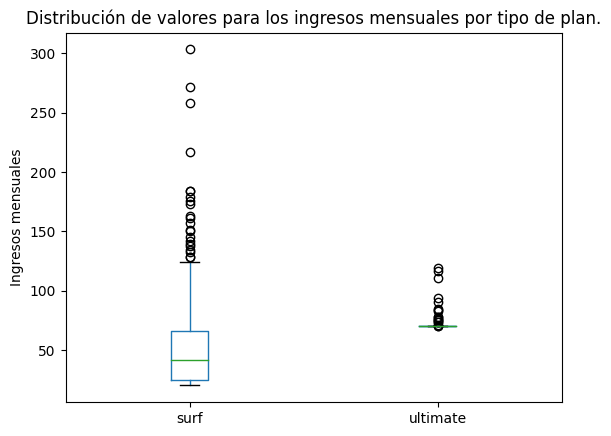

In [45]:
# Ahora comprobaremos la distribución de los gastos promedio por mes:
df_planes_graf_2 = df_user_sum_2.pivot_table(index='user_id',columns='plan',values='Importe_Mes',aggfunc='mean')
print("Promedio gastado por usuario y plan: \n",df_planes_graf_2)

df_planes_graf_2.plot(kind='box',
                 title = 'Distribución de valores para los ingresos mensuales por tipo de plan.',
                 ylabel='Ingresos mensuales')

plt.show()

En general, vemos que los usuarios del plan **ULTIMATE** tienen, en promedio, un mayor consumo individual, sin embargo, el plan **SURF** ha crecido mucho más rápido, duplicando, incluso, el número de usuarios respecto a **ULTIMATE** para diciembre, lo que, en total se convierte en mayores ingresos.

Así mismo, al explorar el promedio de gasto de ambos planes y su gráfico de cajas y bigotes, es sencillo observar que los usuarios del plan **SURF** tienden a excederse sobre sus límites incluídos y, por ende, pagar más que su precio base, que, luego, se transforma también en mayores ingresos pues los precios que se manejan por minuto, mensaje y Gb extra son mucho más caros que los que se ofrecen para **ULTIMATE**.

## Prueba las hipótesis estadísticas

Basándonos en los datos y gráficos anteriores, comprobaremos si los ingresos de cada plan pueden ser facilmente distinguibles entre ellos, para esto, aplicaremos una prueba de la librería scipy que nos permite evaluar las medias en base a la varianza de dos arrays de información.

Hipótesis nula: *Los ingresos por plan son inidentificables entre sí.*

Hipótesis alternativa: *Al revisar el dato de un ingreso promedio, podemos saber a qué plan pertenece el usuario.*

In [46]:
# Separamos nuestro df de usuarios y planes por tipo de plan y nos quedamos solo con los ingresos:
ing_surf = df_user_sum_2['Importe_Mes'][df_user_sum_2['plan']=='surf']
ing_ultimate = df_user_sum_2['Importe_Mes'][df_user_sum_2['plan']=='ultimate']

# Prueba las hipótesis
alpha = 0.05
prueba = st.ttest_ind(ing_surf,ing_ultimate,equal_var=False)

print('Valor p:', prueba.pvalue)

if (prueba.pvalue < alpha):
    print("Rechazamos la hipótesis nula. Los ingresos de los planes por usuario son diferentes.")
else:
    print("No podemos rechazar la hipótesis nula. No es sencillo distinguir a qué plan corresponderán los ingresos.")

Valor p: 2.3751010613462978e-30
Rechazamos la hipótesis nula. Los ingresos de los planes por usuario son diferentes.


Por último, haremos una prueba para ver si los patrones de consumo son homogéneos entre todas las áreas o regiones de donde se tienen datos. Para esto, se ha elegido comparar a aquellos usuarios de la región NY-NJ (Nueva York y New Jersey) contra el resto de regiones.

Hipótesis nula: *Los consumos no variarán según la región.*

Hipótesis alternativa: *Los consumos de los usuarios de la región NY-NJ serán distinguibles respecto a los de usuarios de otras regiones.*

In [62]:
# Agregamos el codigo de estado (creado anteriormente a partir de la columna "city") al dataframe donde tenemos los usuarios
# con sus planes y cuanto ingresan a dicho plan.
df_user_sum_reg = df_user_sum_2.merge(df_users[['user_id','state_code']],how='left',left_on='user_id',right_on='user_id')

# Haciendo una inspección, se identifica que todos los registros de usuarios de la zona NY-NJ también incluyen "-PA" dentro
# de su código de estado:
print(df_user_sum_reg[df_user_sum_reg['state_code'].str.contains('NY-NJ')].sample(5))

# Se crean los arrays por regiones:
ing_nynj = df_user_sum_reg['Importe_Mes'][df_user_sum_reg['state_code'].str.contains('NY-NJ')]
ing_otros = df_user_sum_reg['Importe_Mes'][~df_user_sum_reg['state_code'].str.contains('NY-NJ')]

print("\n")

print(f"Promedio de ingresos para los planes de usuarios de la región NY-NJ: ${ing_nynj.mean():.2f}")
print(f"Promedio de ingresos para los planes de usuarios de las demás regiones: ${ing_otros.mean():.2f}")

# Prueba las hipótesis
alpha = 0.05
prueba = st.ttest_ind(ing_nynj,ing_otros,equal_var=False)
print("\n")

print('Valor p:', prueba.pvalue)

print("\n")

if (prueba.pvalue < alpha):
    print("Rechazamos la hipótesis nula. Los ingresos de los planes en la región NY-NJ son diferentes a los de las demás regiones.")
else:
    print("No podemos rechazar la hipótesis nula. No es sencillo distinguir a qué región corresponderán los ingresos.")

      user_id  month_no  no_calls  total_dur  total_mss    gb_used  plan  \
1386     1299         8      64.0     409.02       15.0  13.879717  surf   
466      1099         6      61.0     400.28       11.0  14.078574  surf   
664      1140         8      89.0     542.74       13.0  20.169697  surf   
869      1181        12      75.0     487.02       31.0  17.111621  surf   
598      1127         7      35.0     231.33       10.0  21.102314  surf   

      Importe_Mes state_code  
1386    20.000000   NY-NJ-PA  
466     20.000000   NY-NJ-PA  
664     71.696973   NY-NJ-PA  
869     41.116211   NY-NJ-PA  
598     81.023145   NY-NJ-PA  


Promedio de ingresos para los planes de usuarios de la región NY-NJ: $56.23
Promedio de ingresos para los planes de usuarios de las demás regiones: $61.95


Valor p: 0.01673325154703305


Rechazamos la hipótesis nula. Los ingresos de los planes en la región NY-NJ son diferentes a los de las demás regiones.


## Conclusión general

A lo largo de este proyecto, hemos explorado, interpretado, corregido y nutrido una base de datos proveniente de la compañía de telecomunicaciones Megaline. A través de las líneas de código anterior, hemos podido conocer un poco más acerca del como consumen los usuarios de los dos planes de telefonía (móvil) de Megaline: **SURF** y **ULTIMATE**.

Hemos comprendido las diferencias fundamentales entre estos dos planes y los beneficios y desventajas que cada uno presenta:
1) **ULTIMATE**: es un plan con un precio base más caro, pero incluye más prestaciones y el precio a pagar si se excede en un rubro es más indulgente.
2) **SURF**: es el plan con precio base más barato, sin embargo, incluye menos prestaciones y el excederse en cualquier rubro conlleva precios más elevados por consumo.

Al analizar los patrones de consumo para los usuarios de cada plan, hemos visto que estos no son tan diferentes, es decir, consumen de forma similar minutos de llamadas, mensajes y Gb de internet, sin embargo, comprobamos que esto se traduce en que los usuarios del plan **SURF** son mucho más suceptibles a excederse en su plan que los de **ULTIMATE**, ultimadamente resultando en que la distribución del ingreso por plan por usuario al mes está mucho más cerrada en el plan **ULTIMATE**; es decir, la gran mayoría de los usuarios se mantienen cercanos a la media que, además, resulta ser muy próxima al precio base.

Por úlimo, se quiso verificar si los patrones de consumo pudieran depender de la zona geográfica de los usuarios, para esto, se probó comparando a los usuarios de la región de Nueva York - New Jersey (-Pennsylvania) con los del resto de las regiones y hemos podido confirmar que la región es un factor importante para determinar los patrones de consumo de los usuarios.